# Probability background

## Imports

In [1]:
%config InlineBackend.figure_format="retina"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

## Probability

- **Sample space** $\mathcal{X}$ is the set of all possible events from an **experiment**
- **Event** $A$ is a subset of $\mathcal{X}$

## Conditional probability

$$
P(A \mid B) = \frac{P(A, B)}{P(B)}
$$

$A$ & $B$

$$
P(A, B) = P(A \cap B)
$$ 

$A$ given $B$

$$
P(A \mid B)
$$


## Discrete random variables and distributions

- **Probability Mass Function (PMF)**
  is a function that return probabilities of discrete values.
  All values sum up to 1.
- **Cumulative Distribution Function (CDF)**
  is a function that returns probabilty that value is less than or equal to parameter.
  It is monotonically increasing,
  right-continuous,
  converge to 0 at $- \infty$,
  1 at $-\infty$.

### Discrete uniform distribution

$$
P(X = x) = {\frac {1}{b - a + 1}} = \frac{1}{n}
$$

For interval $[a, b]$,
otherwise $P(X = x) = 0$,
where $n=b-a+1$ is the total number of values $x$ can take.

![Uniform distribution](images/discrete_uniform_pmf_cdf.png)


### Binomial distribution

A **Bernoulli trial** is an experiment with only two possible outcomes.
$n$ indepentent Bernoulli trials
with a success probability $p$.
This distribution of $X$ is a Binomial distribution.

$$
P(X = x) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}
$$

Only considers total number of successes,
not order.
First term is Binomial Coefficient—it
computes all possible combinations of $x$ elements
taken from a set of $n$ elements.
Second term counts the number of $x$ successes
in $n$ trials.

At $n = 1$,
Binomial distribution is known as
Bernoulli distribution.

![Binomial distribution](images/binomial_pmf_cdf.png)


### Poisson distribution

The probability that $x$ events happen
during a fixed time interval.
These events occur with an average rate $\mu$
and independent from each other.
Used when there are a large number of trials,
each with a small probability of success:

- Radioactive decay
- Number of car accidents

$$
P(X = x)  = \frac{\mu^{x} e^{-\mu}}{x!}, x = 0, 1, 2, \dots
$$

It is an infite set.

As $\mu$ increases,
Poisson approximates a (discrete) Normal distribution.
A Binomial distribution can be approximated with a Poisson
when $n >> p$.

$$
\text{Pois}(\mu=np) \approx \text{Bin}(n, p)
$$

![Poisson distribution](images/poisson_pmf_cdf.png)


## Continuous random variables and distributions

- **Probability Density function (PDF)** is for continuous distributions.
  Height can be larger than 1.
  Area under the curve over entire support is 1.
  $$
  P(a < X < b) =  \int_a^b pdf(x) dx
  $$
    - The PDF can take on any value $x$,
      but the probability af any $x$ is exactly 0
- The CDF for continuous distributions is often smooth.

![CMF PDF PMF](images/cmf_pdf_pmf.png)



### Continuous uniform distribution

$$
p(x \mid a,b)=\begin{cases} \frac{1}{b-a} & if a \le x \le b \\ 0 &  \text{otherwise} \end{cases}
$$

Most common Uniform distribution is $\mathcal{U}(0, 1)$—the
standard Uniform.

![Continuous uniform distibution](images/uniform_pdf_cdf.png)

### Gaussian or normal distribution

$$
 p (x \mid \mu, \sigma) = \frac {1} {\sigma \sqrt {2 \pi}} e^{-\frac {(x -\mu)^2} {2 \sigma^2}}
$$

Standard Gaussian is $\mu=0$ and $\sigma=1$

![Normal distribution](images/normal_pdf_cdf.png)

### Student's t-distribution

$$
p (x \mid \nu, \mu, \sigma) = \frac {\Gamma (\frac {\nu + 1} {2})} {\Gamma (\frac{\nu} {2}) \sqrt {\pi \nu} \sigma} \left (1+ \frac{1}{\nu} \left (\frac {x- \mu} {\sigma} \right)^2 \right)^{-\frac{\nu + 1}{2}}
$$

The distribution to estimate the mean of noramlly distriuted population
when sample size is small.
But also commonly use to generate models
robust to outliers.

$\nu$ is the degrees of freedom
or degree of normality.
As $\nu$ increases,
the distribution approaches a Gaussian,
and $\sigma$—the
scale—trends
towards the standard deviation.
$\nu = 1$ is a Cahchy distribution.
Cauchy does not have a defined mean or variance
You can calculate it,
but the spread is high
and will not decrease as the sample size increases.

![Student's t-distribution](images/student_t_pdf_cdf.png)


### Beta distribution

$$
p (x \mid \alpha, \beta) = \frac {\Gamma (\alpha + \beta)} {\Gamma(\alpha) \Gamma (\beta)} \, x^{\alpha-1} (1 -x)^{\beta-1}
$$

Models behavior of random variables
limited to a finite interval—like
proportions or percentages.

When $\alpha = 1$ and $\beta = 1$,
the Beta distribution reduces to the standard Uniform distribution.

Can express Beta as a fucntion of the mean and dispersion through
$\alpha = \mu \kappa$, $\beta = (1 - \mu) \kappa$
where $\mu$ the mean and $\kappa$ a parameter called concentration.
As $\kappa$ increases the dispersion decreases.

![Beta distribution](images/beta_pdf_cdf.png)


## Joint, Conditional and Marginal Distributions

In a joint distrubution of $X$ and $Y$,

$$
p_{X,Y}(x, y) = P(X = x, Y = y)
$$

To get distribution of $X$,
sum over all possible values of $Y$.

$$
P(X=x) = \sum_y P(X=x, Y=y)
$$

To get the **marginal** distribution of $X$.
This is known as **marginalizing out** $Y$.


## Probability Integral Transform (PIT)

Given a random variable $X$ with a continuous distribution,
and cumulative distribution $F_X$,
we can compute a random variable $Y$ with standard Uniform distribution.

$$
Y = F_X (X) = \mathcal{U}(0, 1)
$$

This is used as a part of a test
to evaluate if a given dataset
can be modeled as arising from a specified distribution.
(` az.plot_loo_pit` and `az.plot_pbv(kind="u_values")`).

PIT can be used to sample from distributions.
If the random variable $X$ is distributed as $\mathcal{U}(0, 1)$,
then$Y = F^{-1}(X)$ has the distribution $F$.
Thus to obtain samples from a distribution we need a random number generator,
and the inverse CDF of the distribution we want.

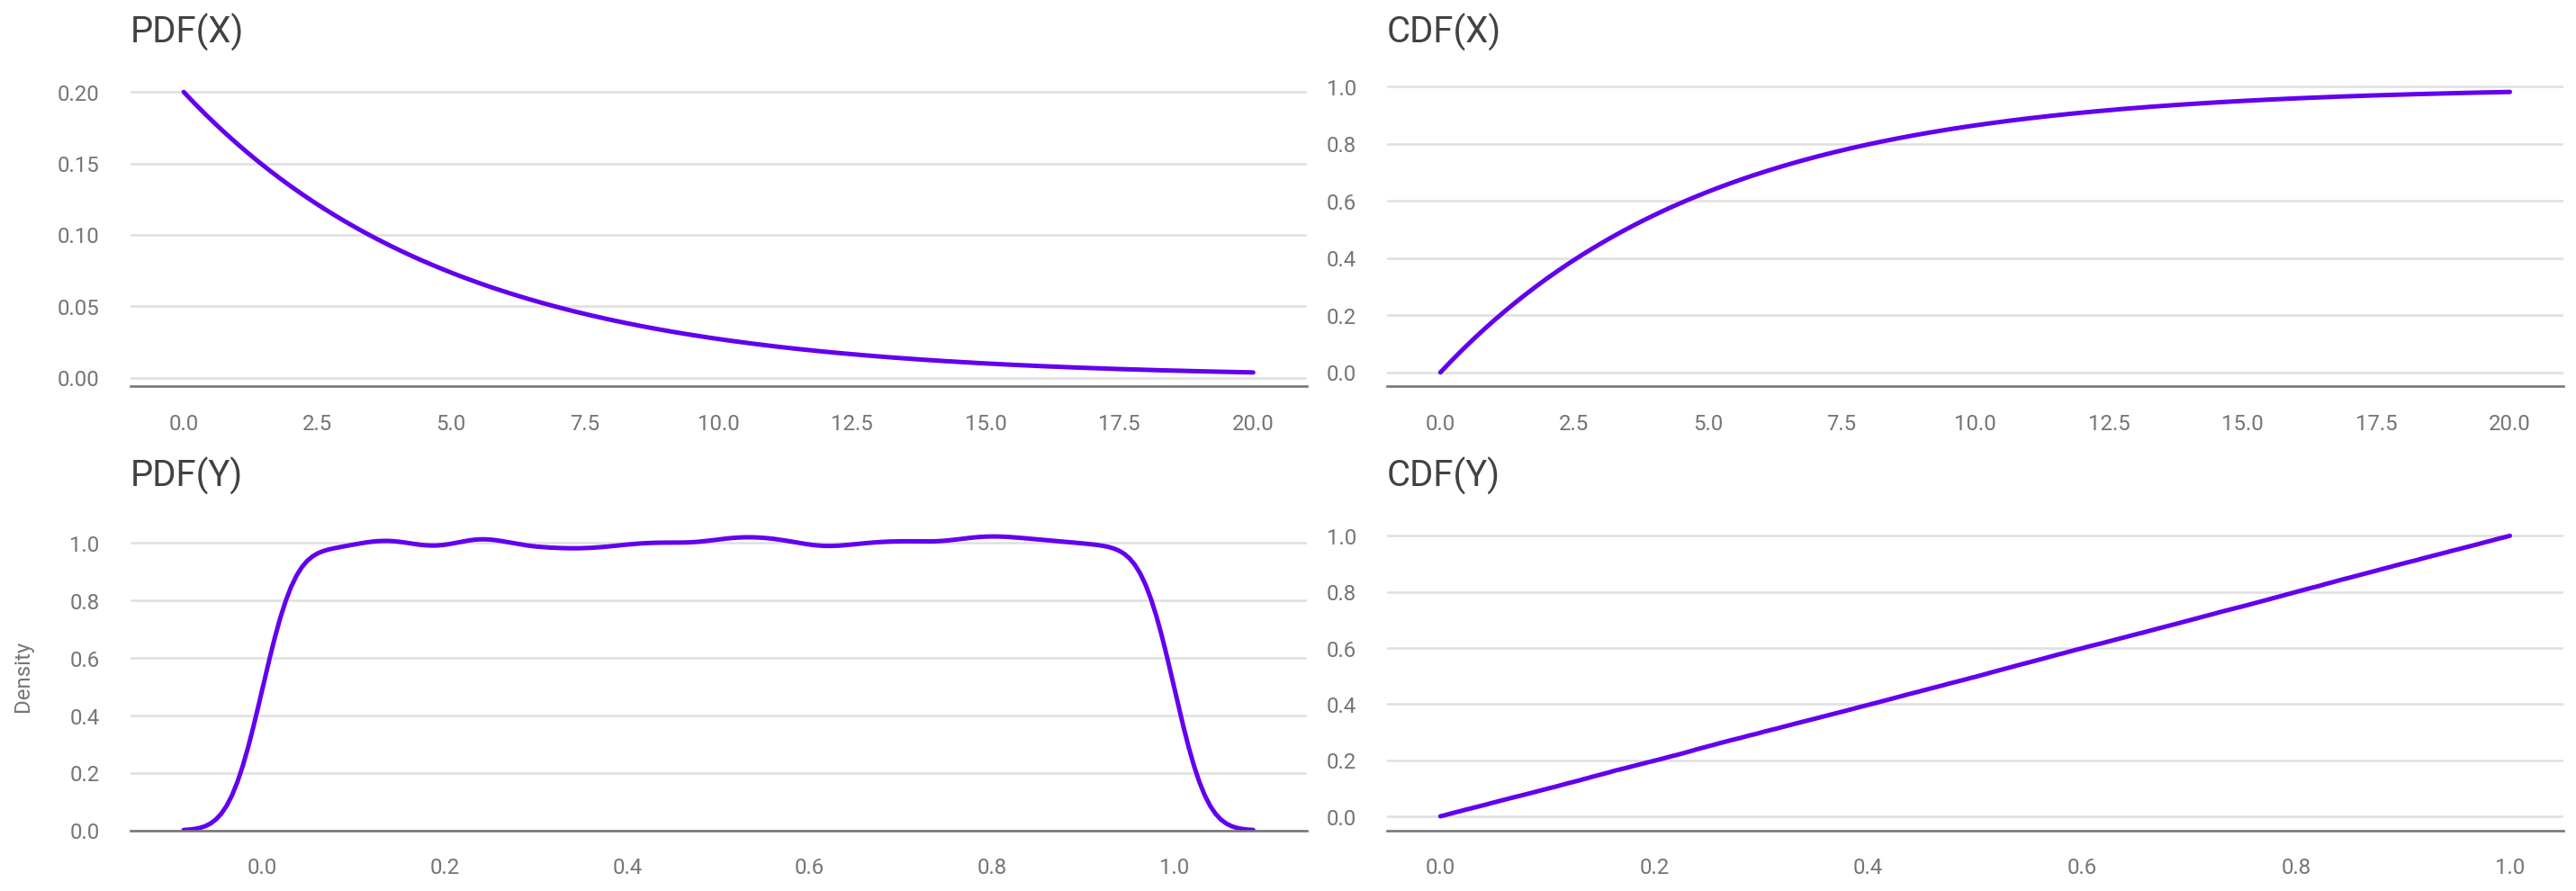

In [29]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(20, 7))
x = np.linspace(0, 20, 200)
exponential_distribution = stats.expon(scale=5)
exponential_samples = exponential_distribution.rvs(100_000)
exponential_cdf = exponential_distribution.cdf(x)
data = exponential_distribution.cdf(exponential_samples)

sns.lineplot(x=x, y=exponential_distribution.pdf(x), ax=ax1).set(title="PDF(X)")
sns.lineplot(x=x, y=exponential_cdf, ax=ax2).set(title="CDF(X)")
sns.kdeplot(x=data, ax=ax3).set(title="PDF(Y)")
sns.lineplot(x=np.sort(data), y=np.linspace(0, 1, len(data)), ax=ax4).set(
    title="CDF(Y)"
)
plt.tight_layout()

## Expectations

A single number summarizing the center of mass of a distribution.

$$
\mathbb{E}(X) = \sum_x x P(X = x)
$$

Variance can measure spread

$$
\mathbb{V}(X) = \mathbb{E}(X - \mathbb{E}X)^2 = \mathbb{E}(X^2 ) - (\mathbb{E}X)^2
$$

standard deviation is the square root of variance.

Expectation is linear.

$$
\mathbb{E}(cX) = c\mathbb{E}(X)
$$

$$
\mathbb{E}(X + Y) = \mathbb{E}(X) + \mathbb{E}(Y)
$$

Variance is not

$$
\mathbb{V}(cX) = c^2\mathbb{V}(X)
$$

in general

$$
\mathbb{V}(X + Y) \neq \mathbb{V}(X) + \mathbb{V}(Y)
$$

one edge case is when $X$ and $Y$ are independent.

$n$th moment of a random variable $X$ is $\mathbb{E}(X^n)$.
So expected value and variance
are first and second moment.
Skew is the third—it
describes the asymettry.

$$
\text{skew}(X) = \mathbb{E}\left(\frac{X -\mu}{\sigma}\right)^3
$$

For unimodal distributions,
a positive skew generally means that the right tail is longer,
and the opposite for a negative skew.

Kurtosis is the fourth moment
and describes the behavior of tails.

$$
\text{Kurtosis}(X) = \mathbb{E}\left(\frac{X -\mu}{\sigma}\right)^4 - 3 
$$

3 is subtrated to make a Gaussian have 0 kurtosis.

## Transformations

Given function $g$,
for $Y = g(X)$,
the PDF is

$$
p_Y(y) = p_X(x) \left| \frac{dx}{dy} \right|
$$

For multivariate random variables,
instead of derivative,
we combute Jacobian determinant.
The absolute value of the Jacobian determinant at a point $p$
gives us the factor by which a function $g$
expands or shrinks volumes near $p$.

$$
p_Y(y)dy = p_X(x)dx
$$

The probability of finding $Y$ in a tiny interval $p_Y(y)dy$
is equal to the probability of finding $X$ in a tiny interval $p_X(x)dx$.

The Jacobian is telling us how we remap probabilities in the space associated to $X$
with those associated with $Y$.

## Limits

###  Law of large numbers

Tthe sample mean of an iid random variable converges,
as the number of samples increase,
to the expected value of the random variable.
Not true for Cauchy distribution
(no mean or variance).

### The central limit theorem

If we sample $n$ values independently from an arbitrary distribution
the mean $\bar X$ of those values will distribute approximately as a Gaussian
as ${n \rightarrow \infty}$.
If:

1. The values are sampled independently
2. Each value come from the same distribution
3. The mean and standard deviation of the distribution must be finite

1 + 2 can be relaxed and still be kinda Gaussian.

## Markov chains

A sequence of random variables
for which the future state is independent from all past ones
given the current state.
If you know the current state,
you know probabilities of all possible future states.

A state is recurrent if it returns to a state over and over again.
A state is transient if the chain will leave it forever.
The chain is irreducible
if it's possible to get from any state to any other state
in a finite number of steps.

If a chain has transient and recurrent states,
the chain will eventually live in the recurrent states.
The **stationary distribution** describes
how much time the chain is going to be at each state.

For a finite Markov chain,
the stationary distribution $\mathbf{s}$ is a PMF
such that $\mathbf{s}\mathbf{T} = \mathbf{s}$—the
distribution is not changed by the transition matrix $\mathbf{T}$.

Under various conditions,
the stationary distribution of a finite Markov chain exists and is unique,
and the PMF of $X_n$ converges to $\mathbf{s}$ as $n \to \infty$.

If a PMF $\mathbf{s}$ satisfies the reversibility condition (also known as detailed balance),
$s_i t_{ij} = s_j t_{ji}$ for all $i$ and $j$,
we have the guarantee that $\mathbf{s}$ is a stationary distribution of the Markov chain
with transition matrix $\mathbf{T} = t_{ij}$.
This property is used to prove
that Metropolis-Hastings is guaranted to asymptotically work.

Markov chains satisfy a central limit theorem,
except instead of dividing by $n$,
we divide by the effective sample size.